In [12]:
%pwd

'/Users/voytek/GitHub/NeuralDataScience/Management/Lectures'

In [6]:
x = 2
x?

In [7]:
my_string = 'hello world'
my_string?

In [8]:
# tab completion
print(my_string.capitalize())

Hello world


In [9]:
# multi-cursor
my_list = [
    'one',
    'two',
    'three',
    'four',
]
print(my_list)

['one', 'two', 'three', 'four']


In [10]:
%who

my_list	 my_string	 x	 


$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np
import pandas as pd
from pandas import DataFrame as df
from pandas.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

plt.rcParams["figure.figsize"] = (12, 9)


In [14]:
# import data

jsonfile = 'name_income_id.json'
name_income = pd.read_json(jsonfile)
csvfile = 'age_fleeb.csv'
age_fleeb = pd.read_csv(csvfile)


In [16]:
age_fleeb.describe()


,id,age,fleeb
count,1000.000000,1000.000000,1000.00000
mean,50187.167000,49.397000,16444.94200
std,27847.039949,11.443966,5401.07022
min,215.000000,12.000000,-1.00000
25%,27616.500000,41.000000,13691.75000
50%,49460.500000,50.000000,16941.50000
75%,73987.250000,57.000000,19862.75000
max,99868.000000,86.000000,32772.00000


In [17]:
np.count_nonzero(np.isnan(name_income['income']))

12

In [18]:
np.count_nonzero(age_fleeb['fleeb']==-1)

33

In [23]:
# join the two disparate datasets

df = pd.merge(name_income, age_fleeb, on='id')
df = df[['id', 'age', 'fleeb', 'income']]
# df

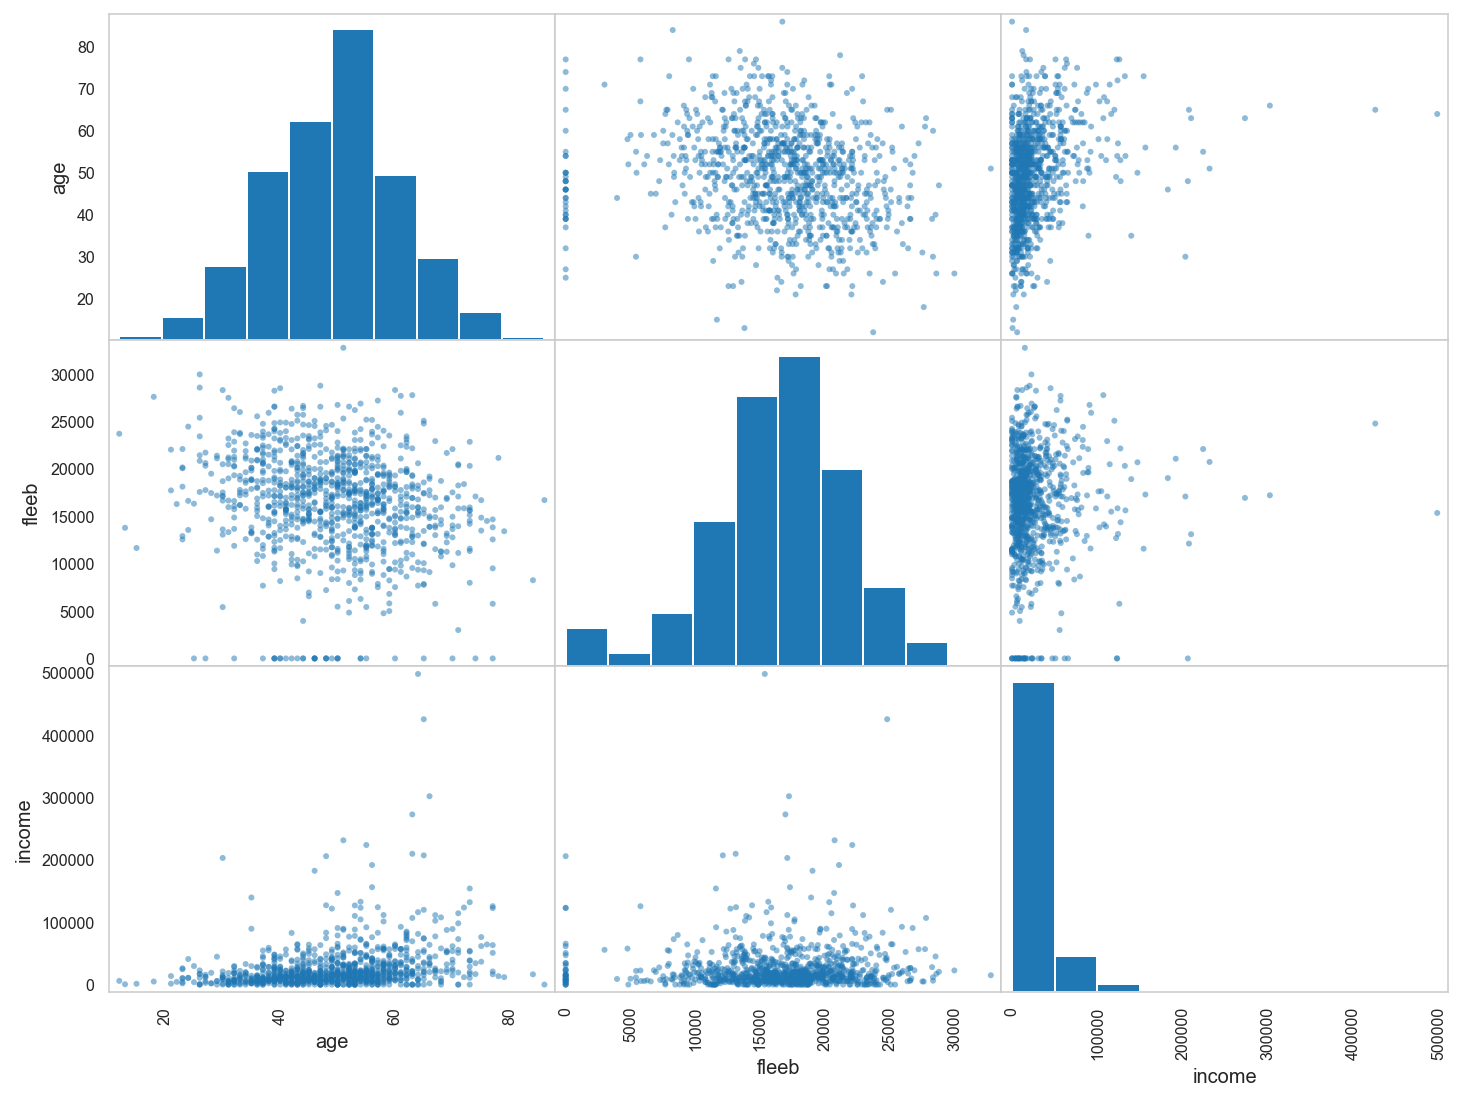

In [24]:
# plot
pd.plotting.scatter_matrix(df[['age', 'fleeb', 'income']])
plt.show()


ValueError: Axis limits cannot be NaN or Inf

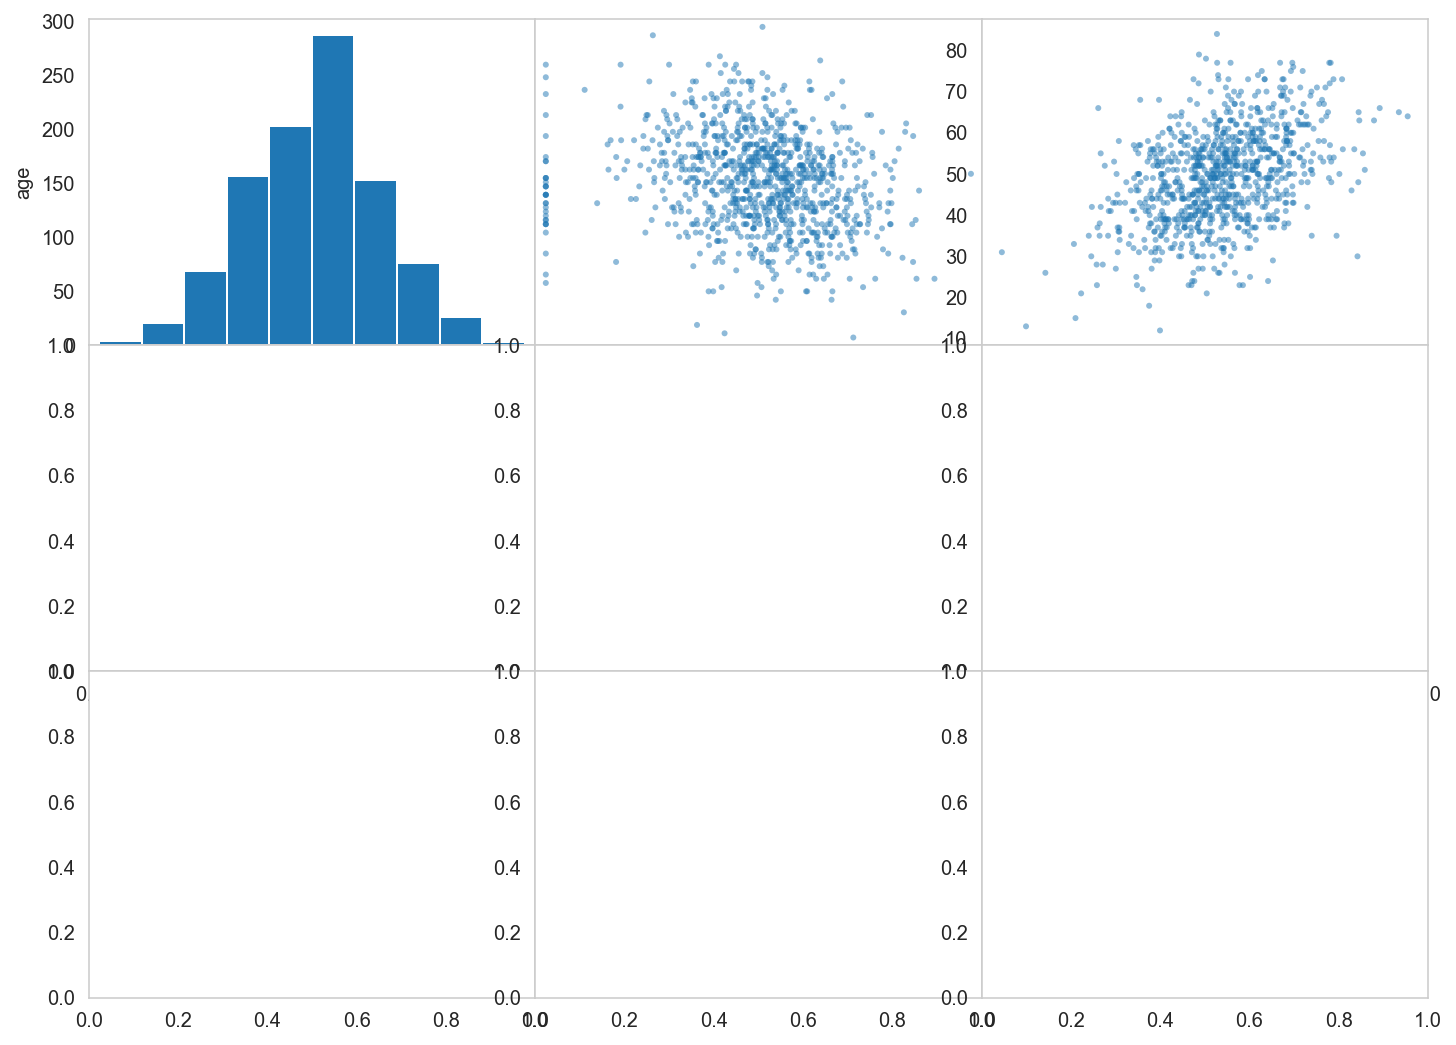

In [25]:
# log transform
df['income'] = np.log10(df['income'])

# plot
pd.plotting.scatter_matrix(df[['age', 'fleeb', 'income']])
plt.show()

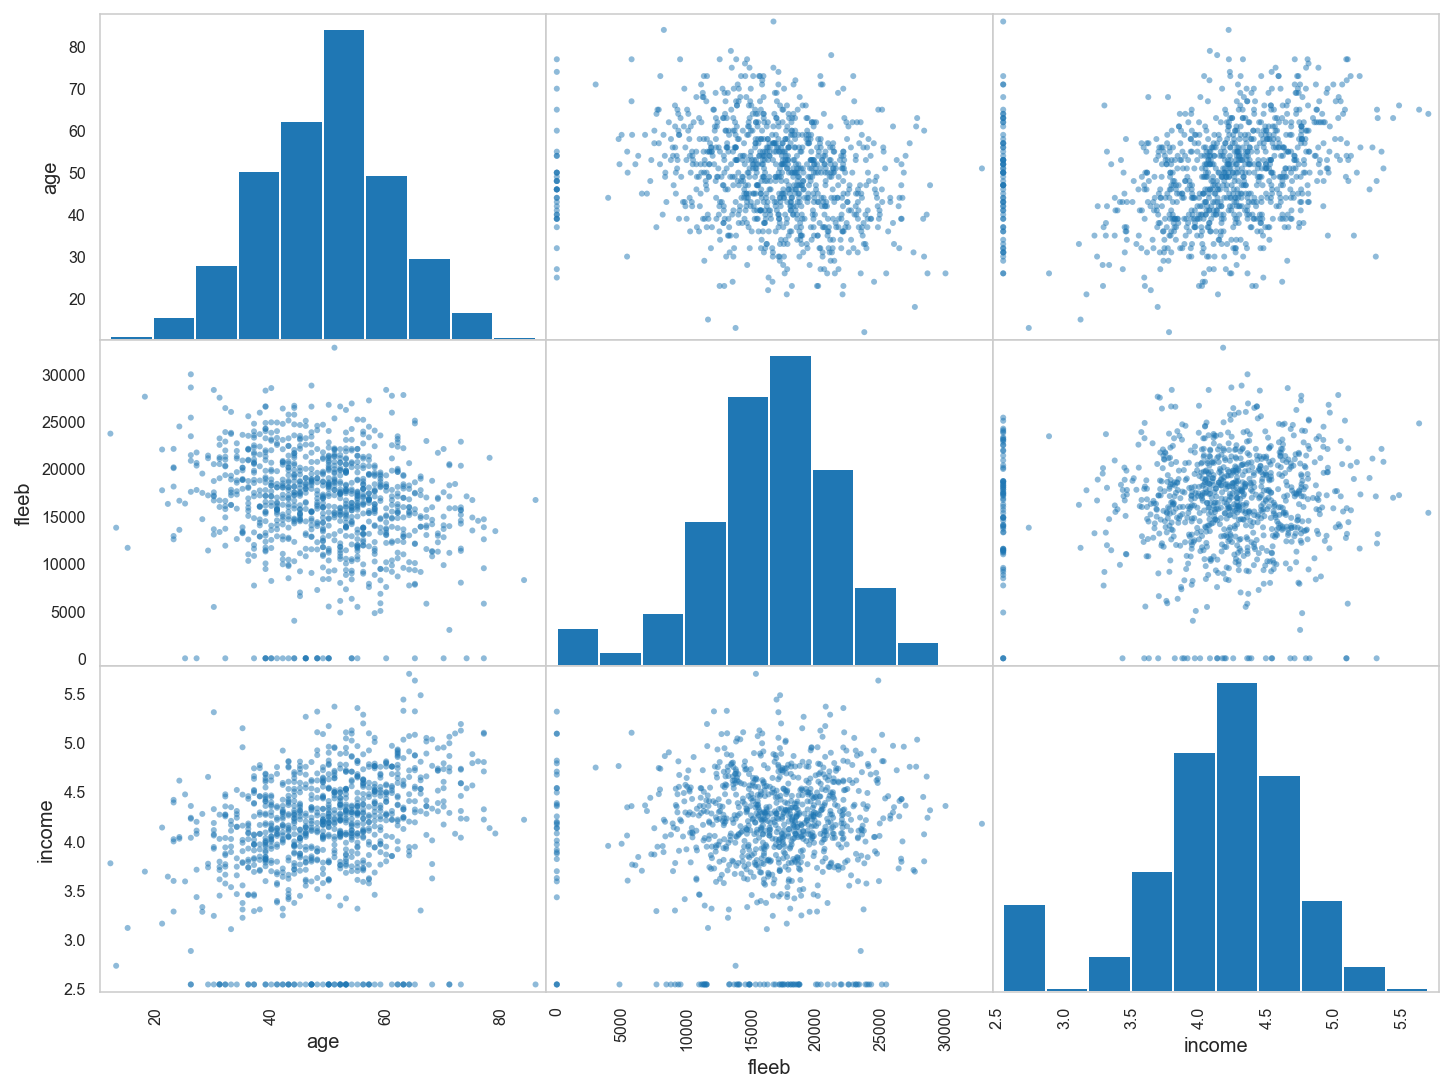

In [28]:
# cut outliers and bad data

jsonfile = 'name_income_id.json'
name_income = pd.read_json(jsonfile)
csvfile = 'age_fleeb.csv'
age_steps = pd.read_csv(csvfile)

df = pd.merge(name_income, age_steps, on='id')
df = df[['id', 'age', 'fleeb', 'income']]

df.loc[df['income']==0, 'income'] = 350

df['income'] = np.log10(df['income'])

# plot
pd.plotting.scatter_matrix(df[['age', 'fleeb', 'income']])
plt.show()

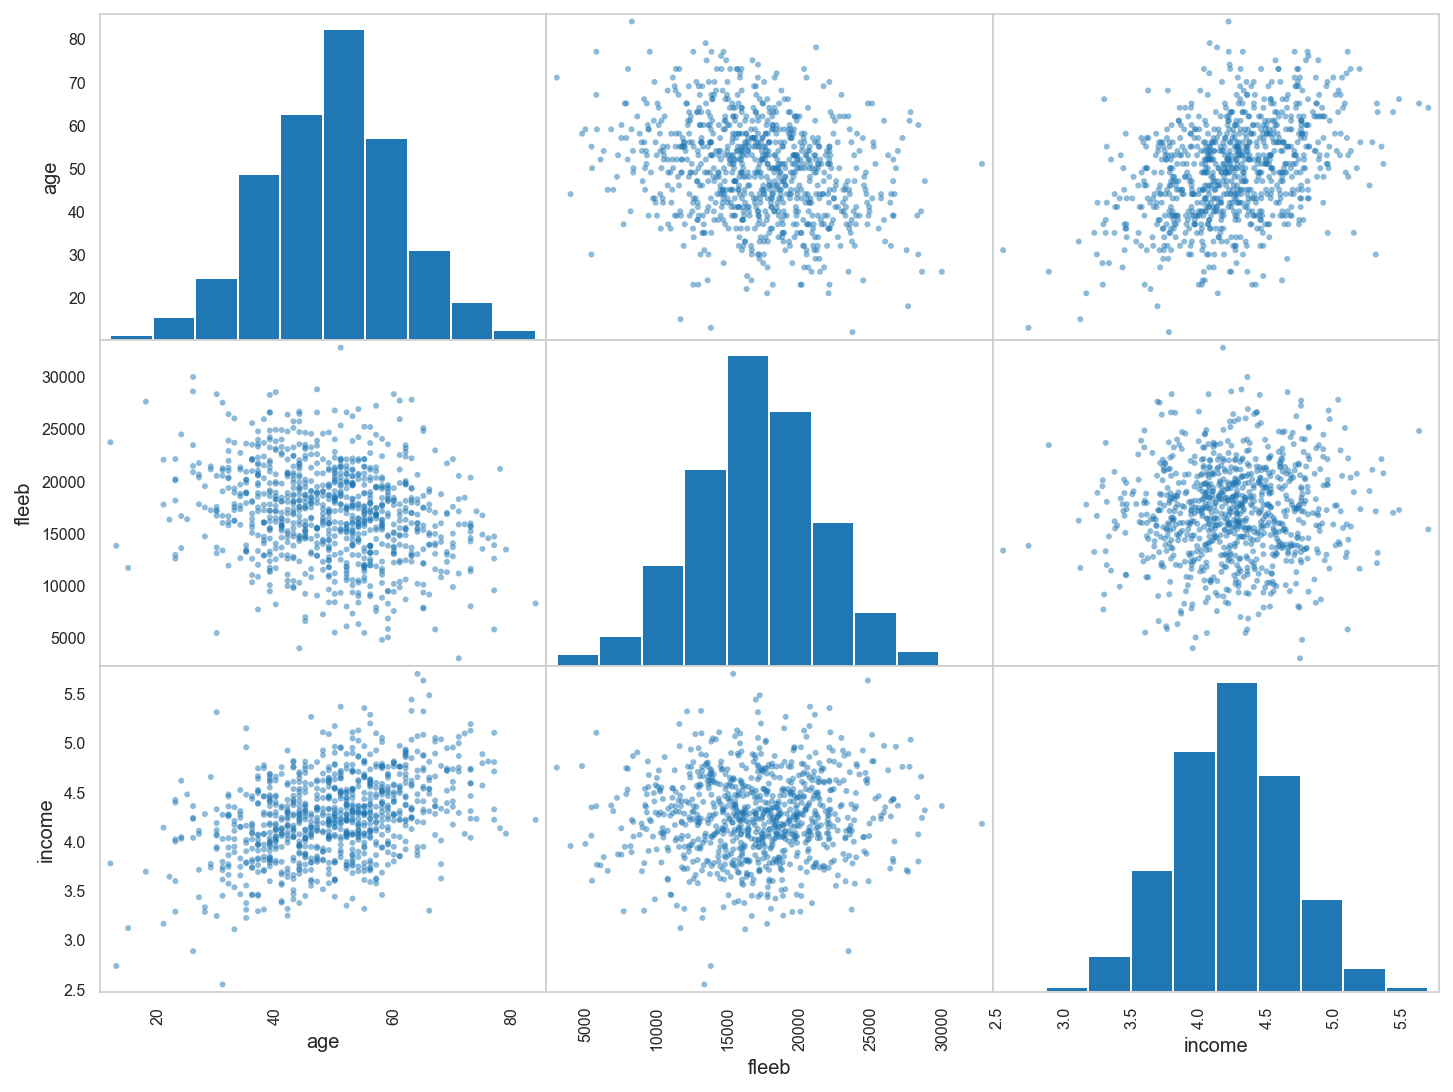

In [29]:
df = df[df.fleeb != -1]
df = df[df.income != np.log10(350)]

pd.plotting.scatter_matrix(df[['age', 'fleeb', 'income']])
plt.show()

In [30]:
np.shape(df)

(896, 4)

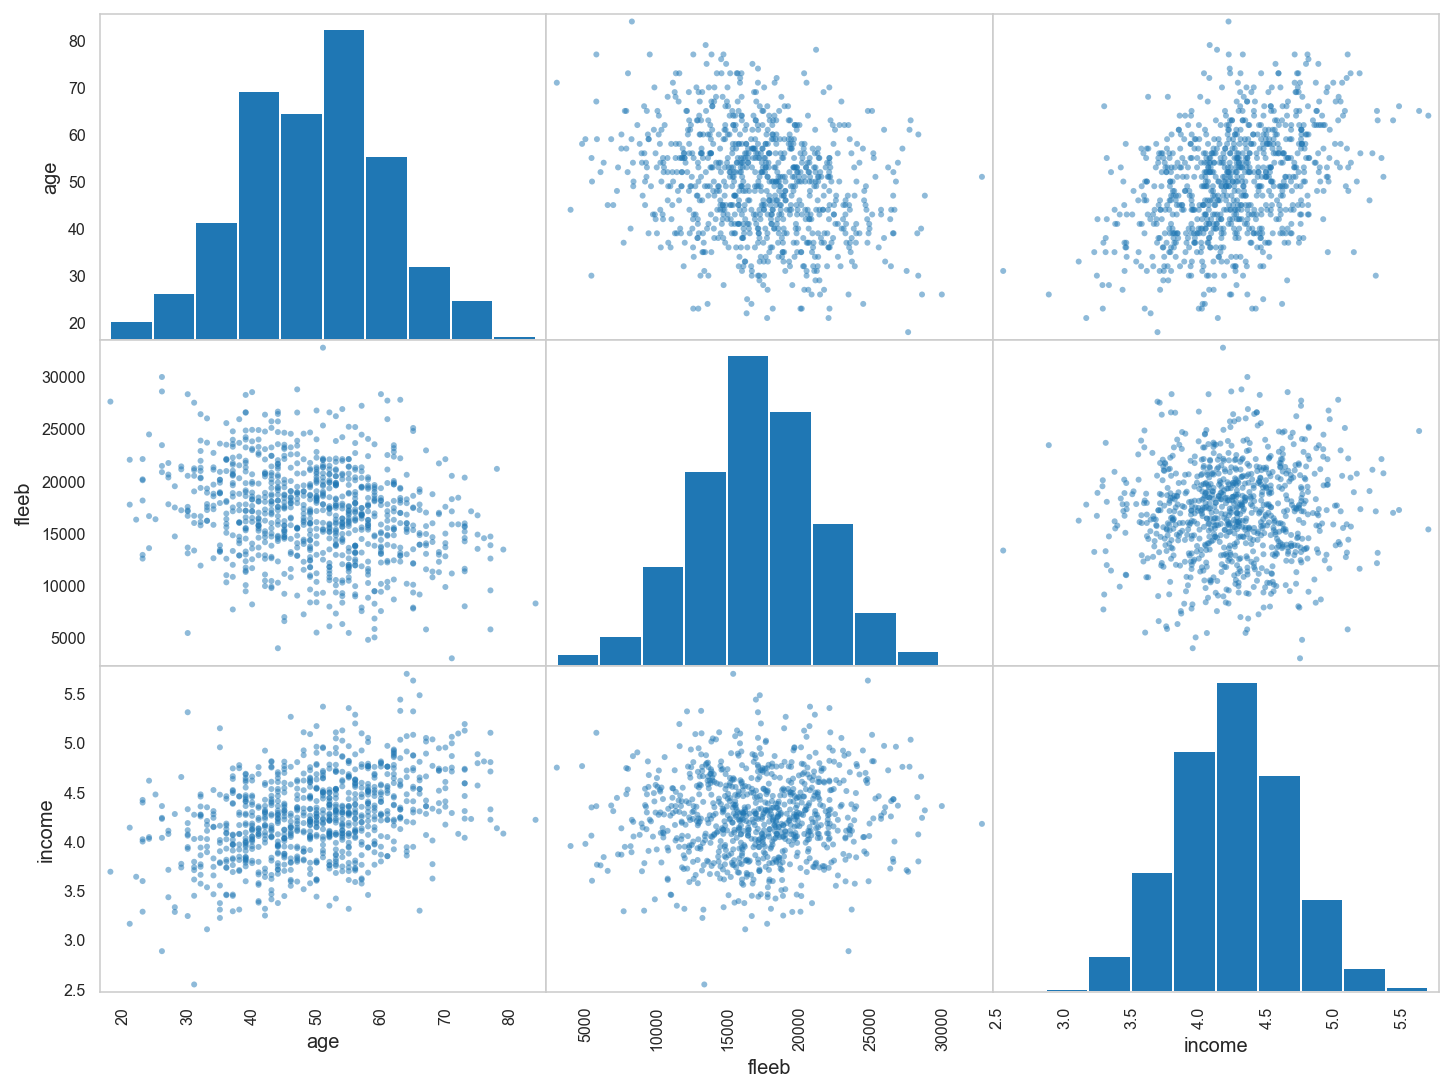

In [31]:
df = df[df.age >= 18]
pd.plotting.scatter_matrix(df[['age', 'fleeb', 'income']])
plt.show()

In [32]:
np.min(df.age), np.shape(df)

(18, (893, 4))

In [39]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('income ~ age + fleeb', data=df, return_type='dataframe') # 

mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     69.18
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           3.68e-40
Time:                        16:36:36   Log-Likelihood:                -394.30
No. Observations:                 881   AIC:                             796.6
Df Residuals:                     877   BIC:                             815.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4257      0.904      3.790